# QF 634 Applied Quantitative Research
## Homework 2 | YU LINGFENG
#### Logistic Regression
* confusion matrix 
* classification report
* Area under the ROC Curve
* PCA improvement

### <font color = green> Activation of necessary libraries. </font>

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from scipy import stats
from IPython.display import display
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

## 👉 <a id = "top">Content Table</a> 👈 
## [Q0. Data set preparation](#q0)

### <font color = green> Import Data </font>
### <font color = green> train_test_split </font>

## [Q1. Logistic Regression](#q1)

### <font color = green> model training </font>

## [Q2. Confusion Matrix](#q2)

### <font color = green> if y = 0 is positive, the confusion Matrix is

#### <font color = red> (row y=0) TP FN </font>
#### <font color = red> (row y=1) FP TN </font>

#### <font color = green> FPR = FP/(TN+FP) </font>

## [Q3. Classification Report](#q3)

### <font color = green> precision | recall | f1-score | support </font>


## [Q4. Area under the ROC Curve](#q4)

### <font color = green> fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg) </font>


## [Q5. PCA improvement](#q5)

### <font color = green> StandardScaler() </font>
### <font color = green> Dimentioinality Reduction </font>

## <a id = "q0">0. </a> <font color = "green"> Data set preparation </font>  [back to table of contents](#top)

### <font color = "blue"> `IMPORT` dataset: `cruise_ship_info.csv`. </font> 
### <font color = "blue"> prepare dataset

In [346]:
file_path = 'banking3.csv'
df = pd.read_csv(file_path, header = 0, index_col = 0)
df

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   euribor3m             41188 non-null  float64
 1   job_blue-collar       41188 non-null  int64  
 2   job_housemaid         41188 non-null  int64  
 3   marital_single        41188 non-null  int64  
 4   education_illiterate  41188 non-null  int64  
 5   default_no            41188 non-null  int64  
 6   contact_cellular      41188 non-null  int64  
 7   month_apr             41188 non-null  int64  
 8   month_aug             41188 non-null  int64  
 9   month_dec             41188 non-null  int64  
 10  month_jul             41188 non-null  int64  
 11  month_jun             41188 non-null  int64  
 12  month_mar             41188 non-null  int64  
 13  month_may             41188 non-null  int64  
 14  month_nov             41188 non-null  int64  
 15  month_oct             41

In [348]:
df.shape

(41188, 19)

In [349]:
list(df.columns)[:2]

['euribor3m', 'job_blue-collar']

In [350]:
droplist = []

In [351]:
data = df.drop(columns=droplist)
data

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [352]:
X=data.iloc[:, :-1]
X

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [353]:
y=data.iloc[:, -1]
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [354]:
X.shape, y.shape

((41188, 18), (41188,))

In [355]:
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
0,1.0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,1.0,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,1.0,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1
3,1.0,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,1.0,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
41184,1.0,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,1.0,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,1.0,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [356]:
### now perform logit regression using statsmodel packaage
### using statsmodel here (and sklearn logistic regression later)
### more conveniently provides 
### regression estimates and p-values so that exceedingly insignificant features 
### can be discarded due to their redundancy or multicollinearity
### with other features
import statsmodels.api as sm
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.282065
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41169
Method:                           MLE   Df Model:                           18
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.1987
Time:                        21:29:13   Log-Likelihood:                -11618.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4859      0.120     -4.052      0.000      -0.721      -0.251
euribor3m               -0.5041      0.014    -36.613      0.000      -0.531      -0.477
job_blue-collar         -0.2217      0.049     -4.521      0.000      -0.318      -0.126
job_housemaid           -0.0841      0.118     -0.714      0.475      -0.315       0.147
marital_single           0.0543      0.038      1.449      0.147      -0.019       0.128
education_illiterate     0.8166      0.647      1.262      0.207      -0.452       2.085
default_no               0.2620      0.056      4.659      0.000       0.152       0.372
contact_cellular         0.1612      0.051      3.144      0.002       0.061       0.262
month_apr               -0.5483      0.104     -5.283      0.000      -0.752      -0.345
month_aug               -0.2313      0.106     -2.184      0.029      -0.439      -0.024
month_dec                0.2136      0.183      1.166      0.244      -0.145       0.573
month_jul                0.0284      0.109      0.260      0.794      -0.185       0.242
month_jun               -0.1071      0.107     -1.002      0.316      -0.317       0.102
month_mar                0.5779      0.128      4.527      0.000       0.328       0.828
month_may               -1.1646      0.099    -11.804      0.000      -1.358      -0.971
month_nov               -0.4133      0.110     -3.749      0.000      -0.629      -0.197
month_oct                0.2030      0.121      1.671      0.095      -0.035       0.441
poutcome_failure        -0.3835      0.053     -7.260      0.000      -0.487      -0.280
poutcome_success         1.5273      0.067     22.960      0.000       1.397       1.658
========================================================================================
"""

In [357]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state = 0) 

## <a id = "q1">1. </a> <font color = "green"> Logistic Regression </font>  [back to table of contents](#top)

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)

In [359]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [360]:
print(Lresult.coef_, Lresult.intercept_)

[[-0.13400512 -0.50275471 -0.22826105 -0.16754795  0.05569475  0.67662921
   0.27874799  0.14069371 -0.63059087 -0.36489399 -0.18100338 -0.06683137
  -0.14799495  0.39098956 -1.25336458 -0.47147098  0.1105383  -0.35451695
   1.47745162]] [-0.25592462]


In [361]:
np.sum(y_test)

1376

## <a id = "q2">2. </a> <font color = "green"> Confusion Matrix </font>  [back to table of contents](#top)

In [362]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[10880,   101],
       [ 1125,   251]], dtype=int64)

if y = 0 is positive,
the confusion Matrix is

#### TP=10880 FN=101
#### FP=1125 TN=251

FPR = FP/(TN+FP)

## <a id = "q3">3. </a> <font color = "green"> Classification Report </font>  [back to table of contents](#top)

In [363]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



## <a id = "q4">4. </a> <font color = "green"> Area under the ROC Curve </font>  [back to table of contents](#top)

In [364]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
# above returns 58.66% of true 1 vs predicted 1 scores, not quite area under ROC%
# This score is close to .score accuracy (some numerical diffs), 
# based on threshold 0.5 only

0.5866075427853183


In [365]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 
    # 1125+251 = 1376 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires 
    # y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds 
    # (Decreasing thresholds used to compute fpr and tpr)
    
    # above can also be done using: 
    # fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. 
    # For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.7905008823379918

In [366]:
tpr

array([0.00000000e+00, 7.26744186e-04, 1.45348837e-03, ...,
       9.97819767e-01, 9.97819767e-01, 1.00000000e+00])

In [367]:
 np.where(thresholds >= 0.5)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158], dtype=int64),)

In [368]:
# Find the index of the threshold closest to 0.5
index_05_threshold = np.where(thresholds >= 0.5)[0][0]

# Retrieve the FPR value for the threshold of 0.5
fpr_at_05_threshold = fpr[index_05_threshold]

print(f"FPR at threshold of 0.5: {fpr_at_05_threshold}")

FPR at threshold of 0.5: 0.0


In [369]:
index_05_threshold

0

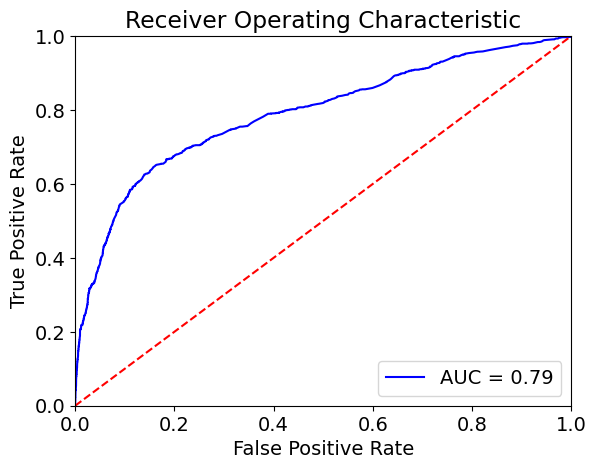

In [370]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## <a id = "q5">5. </a> <font color = "green"> Improvement via PCA</font>  [back to table of contents](#top)

In [371]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
#`StandardScaler` in `sklearn.preprocessing` module is used to 
# standardize features by removing the mean and scaling to unit variance.
X1=scaler.fit_transform(X)

In [372]:
X1=pd.DataFrame(X1)
X1.describe()
# Below we check X1 is standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,41188.0,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,0.0,1.103215e-16,-2.544553e-17,9.000278e-18,8.056314e-17,-1.035072e-17,-5.761903e-17,-3.029743e-17,3.274495e-17,-1.484682e-17,2.039955e-17,-1.789813e-17,-4.174792e-17,-4.243797e-17,-3.795266e-18,6.426075e-18,-4.407684e-17,-2.792539e-17,1.897633e-17
std,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,0.0,-1.722351e+00,-5.383170e-01,-1.625284e-01,-6.249375e-01,-2.090960e-02,-1.946613e+00,-1.318270e+00,-2.612745e-01,-4.200760e-01,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-3.392905e-01,-1.857000e-01
25%,0.0,-1.312994e+00,-5.383170e-01,-1.625284e-01,-6.249375e-01,-2.090960e-02,5.137128e-01,-1.318270e+00,-2.612745e-01,-4.200760e-01,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-3.392905e-01,-1.857000e-01
50%,0.0,7.124599e-01,-5.383170e-01,-1.625284e-01,-6.249375e-01,-2.090960e-02,5.137128e-01,7.585700e-01,-2.612745e-01,-4.200760e-01,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,-7.086396e-01,-3.325325e-01,-1.331974e-01,-3.392905e-01,-1.857000e-01
75%,0.0,7.724221e-01,-5.383170e-01,-1.625284e-01,1.600160e+00,-2.090960e-02,5.137128e-01,7.585700e-01,-2.612745e-01,-4.200760e-01,-6.662113e-02,-4.592528e-01,-3.850423e-01,-1.159068e-01,1.411155e+00,-3.325325e-01,-1.331974e-01,-3.392905e-01,-1.857000e-01
max,0.0,8.208531e-01,1.857642e+00,6.152772e+00,1.600160e+00,4.782491e+01,5.137128e-01,7.585700e-01,3.827393e+00,2.380521e+00,1.501025e+01,2.177450e+00,2.597117e+00,8.627624e+00,1.411155e+00,3.007225e+00,7.507656e+00,2.947327e+00,5.385030e+00


In [373]:
# check correlation of features after standardization
cor=X1.corr()

In [374]:
count = np.count_nonzero(cor > 0.9)
print(count)

18


In [375]:
from sklearn.decomposition import PCA
pca = PCA(n_components = X1.shape[1]-1)
pc = pca.fit_transform(X1)
print('explained variance ratio: %s' %pca.explained_variance_ratio_)
# % is used for string formatting placed in front of following numbers

explained variance ratio: [0.124356   0.09772664 0.07382356 0.06815675 0.06616267 0.06389616
 0.06035933 0.05747367 0.05632219 0.05552809 0.05522497 0.0506611
 0.0472097  0.04307403 0.0413422  0.02747155 0.01032174 0.00088965]


In [376]:
len(pca.explained_variance_ratio_)

18

Text(0, 0.5, 'cumulative explained variance')

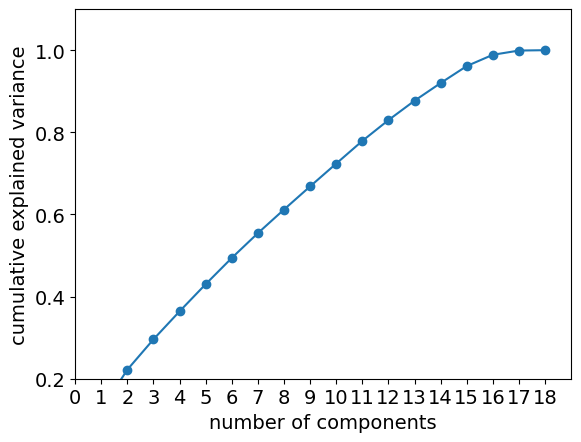

In [377]:
plt.plot(range(1,X1.shape[1]),np.cumsum(pca.explained_variance_ratio_))
plt.scatter(range(1,X1.shape[1]),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,X1.shape[1])
# Set x-axis ticks with a step of 1
plt.xticks(range(0, X1.shape[1], 1))
plt.ylim(0.2,1.1)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [378]:
len(pca.explained_variance_ratio_)

18

In [379]:
pc_name_list = []
for i in range(len(pca.explained_variance_ratio_)):
    pc_name_list += [f'pc_{i+1}']
pc_name_list    

['pc_1',
 'pc_2',
 'pc_3',
 'pc_4',
 'pc_5',
 'pc_6',
 'pc_7',
 'pc_8',
 'pc_9',
 'pc_10',
 'pc_11',
 'pc_12',
 'pc_13',
 'pc_14',
 'pc_15',
 'pc_16',
 'pc_17',
 'pc_18']

In [380]:
pc_X = pd.DataFrame(pc,columns = pc_name_list)

In [381]:
pc_X

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
0,-0.866660,-1.332540,-1.194860,1.400760,0.017719,2.135391,0.267773,1.654675,-0.197268,-0.307753,-0.490187,0.561556,1.121990,-0.340770,0.597056,0.126994,-0.011131,0.015908
1,0.760598,-0.995371,0.014962,0.428857,-2.137880,-1.595636,1.025161,0.552147,0.132605,-0.038592,-0.101477,-0.874305,-0.297486,0.565226,0.551603,-0.437647,-0.104433,-0.005222
2,1.984785,0.364755,3.987798,-1.411441,1.446268,0.377170,0.758686,1.230392,0.057436,-0.258976,0.273414,-2.296638,2.180817,-1.366831,-2.183273,-0.195376,-0.551037,-0.130714
3,2.181388,0.323045,-0.067353,-0.758619,-0.865981,2.216754,-1.069678,-1.017049,0.076020,-0.100216,0.255643,-1.518348,-1.255196,1.120662,0.797085,-0.072454,-0.133279,-0.014074
4,2.595280,-0.914344,2.020070,1.368726,2.161944,1.331245,1.636800,1.838614,-0.071026,-0.373422,-0.129208,-2.561338,0.651177,-1.131635,-2.008228,1.001882,0.631505,-0.166543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-2.387128,0.190373,1.783596,-0.434167,-1.075903,1.161763,0.120632,0.087010,0.050173,0.108761,-0.283369,0.563017,0.647404,1.021419,-1.018058,-0.450523,-0.026665,-0.007879
41184,-2.056759,0.752683,-0.300339,1.610375,0.573676,0.727790,2.778082,-4.504680,1.175636,1.958190,-1.315963,-0.379448,1.805456,-0.183292,0.833909,0.183577,-0.042242,0.011777
41185,-1.569105,1.198346,-0.316829,0.333279,0.928050,-0.597633,-0.576649,-0.260352,0.033691,0.040329,0.196312,0.001294,1.745390,1.690156,0.022451,0.352743,-0.071769,0.014460
41186,1.461949,1.186059,2.287289,-0.572896,1.385342,-0.019436,2.421658,-0.200789,-5.328741,0.616426,-0.666884,2.387444,-1.639552,1.623897,2.166829,0.066600,1.156650,-0.054022


In [382]:
# Check
pc_X.corr()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
pc_1,1.000000e+00,7.729395e-16,-2.765192e-18,1.438869e-16,-1.181946e-16,3.742625e-16,1.150365e-16,-1.852898e-17,3.738253e-17,-1.362494e-16,7.975698e-17,-2.886891e-17,-1.200796e-16,1.984396e-16,-2.216224e-17,-1.537989e-16,4.795816e-17,1.417487e-16
pc_2,7.729395e-16,1.000000e+00,1.195643e-16,-3.404305e-16,-2.119989e-16,6.053469e-16,1.728608e-16,3.677758e-16,1.361888e-16,4.289353e-17,-2.150406e-16,4.835284e-17,-1.594025e-16,3.062143e-17,-2.166049e-17,-2.932654e-16,3.689861e-17,-2.103174e-16
pc_3,-2.765192e-18,1.195643e-16,1.000000e+00,3.462460e-16,-1.181071e-16,-9.972403e-17,1.571187e-16,-1.687089e-16,-1.561301e-16,-3.406167e-17,7.946818e-17,-2.367296e-16,-3.717883e-16,4.145782e-17,3.842906e-16,3.262355e-16,1.367194e-16,-3.435973e-16
pc_4,1.438869e-16,-3.404305e-16,3.462460e-16,1.000000e+00,3.252241e-17,-1.634514e-17,-3.365355e-16,-7.545203e-18,1.339722e-17,-2.690795e-17,6.113772e-18,8.568032e-17,-1.853462e-16,1.069441e-16,7.379388e-17,2.917677e-17,5.180360e-17,-6.870986e-17
pc_5,-1.181946e-16,-2.119989e-16,-1.181071e-16,3.252241e-17,1.000000e+00,-5.942139e-17,-6.952050e-16,1.682175e-16,2.607056e-16,1.201843e-16,2.821489e-16,3.734869e-17,2.929304e-17,4.460295e-17,-1.897166e-16,-1.037388e-16,2.135973e-16,-2.499892e-16
pc_6,3.742625e-16,6.053469e-16,-9.972403e-17,-1.634514e-17,-5.942139e-17,1.000000e+00,5.594296e-17,-2.086521e-16,-2.176002e-16,-1.579635e-16,-1.165555e-16,-1.085914e-16,7.949812e-17,-9.133373e-17,3.210051e-16,8.690851e-17,2.236445e-16,-2.939737e-17
pc_7,1.150365e-16,1.728608e-16,1.571187e-16,-3.365355e-16,-6.952050e-16,5.594296e-17,1.000000e+00,-9.802849e-17,-9.916466e-17,-2.549384e-16,-2.476040e-16,-3.795231e-16,-7.542047e-17,1.795318e-17,1.211023e-16,1.235531e-16,1.413643e-16,-9.366624e-17
pc_8,-1.852898e-17,3.677758e-16,-1.687089e-16,-7.545203e-18,1.682175e-16,-2.086521e-16,-9.802849e-17,1.000000e+00,-1.619374e-16,-8.748983e-17,1.918176e-16,5.027286e-18,-3.943591e-17,3.259735e-16,9.831267e-17,-1.466588e-17,-6.449812e-17,9.578386e-17
pc_9,3.738253e-17,1.361888e-16,-1.561301e-16,1.339722e-17,2.607056e-16,-2.176002e-16,-9.916466e-17,-1.619374e-16,1.000000e+00,-6.148550e-16,5.904868e-16,3.102932e-17,-5.178374e-17,-1.807291e-17,-3.244507e-17,-1.379606e-17,1.464954e-16,-1.234861e-16
pc_10,-1.362494e-16,4.289353e-17,-3.406167e-17,-2.690795e-17,1.201843e-16,-1.579635e-16,-2.549384e-16,-8.748983e-17,-6.148550e-16,1.000000e+00,7.673713e-17,4.411660e-18,6.861344e-17,2.440057e-17,-1.122337e-16,6.355103e-18,-2.838564e-17,-1.631526e-16


In [383]:
### now perform logit regression using statsmodel packaage
### using statsmodel here (and sklearn logistic regression later) 
### more conveniently provides regression estimates
### and p-values so exceedingly insignificant features can be discarded
### in logistic reg/due to redundancy or multicoll
import statsmodels.api as sm
result=sm.Logit(y,pc_X).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.645594
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                 -0.8339
Time:                        21:29:14   Log-Likelihood:                -26591.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pc_1           0.4468      0.013     34.438      0.000       0.421       0.472
pc_2           0.0467      0.

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = pc_X.columns
vif["VIF"] =\
    [variance_inflation_factor(pc_X.values, i) for i in range(pc_X.shape[1])]

# Display the VIF dataframe
print(vif)

   Variable  VIF
0      pc_1  1.0
1      pc_2  1.0
2      pc_3  1.0
3      pc_4  1.0
4      pc_5  1.0
5      pc_6  1.0
6      pc_7  1.0
7      pc_8  1.0
8      pc_9  1.0
9     pc_10  1.0
10    pc_11  1.0
11    pc_12  1.0
12    pc_13  1.0
13    pc_14  1.0
14    pc_15  1.0
15    pc_16  1.0
16    pc_17  1.0
17    pc_18  1.0


In [385]:
from sklearn import metrics
X_train, X_test, y_train, y_test =\
    train_test_split(pc_X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)

In [386]:
y_pred1 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [387]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[10880   101]
 [ 1125   251]]


In [388]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [389]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
# above returns 58.66% of true 1 vs predicted 1 scores, not quite area under ROC%
# This score is same as accuracy

0.5866075427853183


In [390]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the
    # 1125+251 = 1376 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires 
    # y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds 
    # (Decreasing thresholds used to compute fpr and tpr)
    
    # above can also be done using: 
    # fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. 
    # For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.7906445964806018

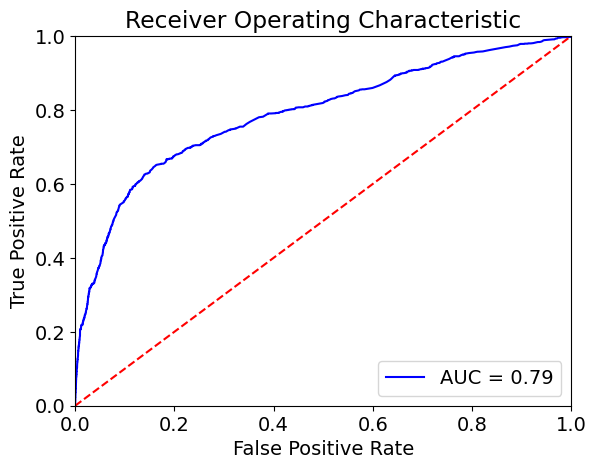

In [391]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()